In [1]:
#import SLModels from ../src/SLmodels.py
import numpy
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from SLmodels import *

In [14]:
import datetime as dt
import glob
import os
import re


datalocation = '../data/'
figure_destination = '../figures/'


daterange_start_str = '2025-10-30'
daterange_end_str = '2025-12-30'

start_date = dt.datetime.strptime(daterange_start_str, '%Y-%m-%d')
end_date = dt.datetime.strptime(daterange_end_str, '%Y-%m-%d')

file_pattern = os.path.join(datalocation, '1dSSH_*.dat')
initial_file_list = sorted(glob.glob(file_pattern))

# --- Filter the list based on the date range ---
filtered_list = []
for filepath in initial_file_list:
    # FIXED: Updated regex to handle date-time format (YYYY-MM-DD-HHMMSS)
    match = re.search(r'_(\d{4}-\d{2}-\d{2})-\d{6}', filepath)
    if match:
        date_str = match.group(1)  # This extracts just the date part (YYYY-MM-DD)
        
        file_date = dt.datetime.strptime(date_str, '%Y-%m-%d')
        print(file_date)
        # Check if the file's date is within the desired range
        if start_date <= file_date <= end_date:
            filtered_list.append(filepath)
            print(f"Added file: {os.path.basename(filepath)}")  # Debug: show which files are added

2025-12-08 00:00:00
Added file: 1dSSH_L20000_w_1.5_disorder0.0-2.0_numEigs600_realizations75_2025-12-08-002905_H_IPR.dat
2025-12-08 00:00:00
Added file: 1dSSH_L20000_w_1.5_disorder0.0-2.0_numEigs600_realizations75_2025-12-08-002905_H_eigval.dat
2025-12-08 00:00:00
Added file: 1dSSH_L20000_w_1.5_disorder0.0-2.0_numEigs600_realizations75_2025-12-08-002905_seeds.dat
2025-12-08 00:00:00
Added file: 1dSSH_L20000_w_1.5_disorder0.0-2.0_numEigs600_realizations75_2025-12-08-002905_spectral_localiser_IPR.dat
2025-12-08 00:00:00
Added file: 1dSSH_L20000_w_1.5_disorder0.0-2.0_numEigs600_realizations75_2025-12-08-002905_spectral_localiser_eigval.dat


In [ ]:
h_ipr = None
h_eigval = None
seeds = None
spec_loc_ipr = None
spec_loc_eigval = None

for filepath in filtered_list:
    # 1. H_IPR (Inverse Participation Ratio)
    if "H_IPR.dat" in filepath:
        # mmap_mode='r' keeps it on disk, saving RAM
        h_ipr = np.load(filepath, mmap_mode='r')
        print(f"Loaded H_IPR from: {filepath}")

    # 2. H_eigval (Eigenvalues)
    elif "H_eigval.dat" in filepath:
        h_eigval = np.load(filepath, mmap_mode='r')
        print(f"Loaded H_eigval from: {filepath}")

    # 3. Seeds (Likely small integers, safe to load fully into RAM)
    elif "seeds.dat" in filepath:
        seeds = np.load(filepath) 
        print(f"Loaded seeds from: {filepath}")

    # 4. Spectral Localiser IPR
    elif "spectral_localiser_IPR.dat" in filepath:
        spec_loc_ipr = np.load(filepath, mmap_mode='r')
        print(f"Loaded Spectral Localiser IPR from: {filepath}")

    # 5. Spectral Localiser Eigenvalues
    elif "spectral_localiser_eigval.dat" in filepath:
        spec_loc_eigval = np.load(filepath, mmap_mode='r')
        print(f"Loaded Spectral Localiser Eigvals from: {filepath}")

ValueError: This file contains pickled (object) data. If you trust the file you can load it unsafely using the `allow_pickle=` keyword argument or `pickle.load()`.

In [ ]:
import numpy as np
import os

num_disorders = 21   
num_realizations = 75
L_size = 20000      

# Define shapes using the L_size variable
shape_4d = (num_disorders, num_realizations, L_size, L_size)
shape_3d = (num_disorders, num_realizations, L_size)
shape_2d = (num_disorders, num_realizations)

def load_memmap(filepath, dtype, shape):
    if not os.path.exists(filepath):
        print(f"File not found: {filepath}")
        return None
    return np.memmap(filepath, dtype=dtype, mode='r', shape=shape)

H_IPR = None
H_eigval = None
spectral_localiser_IPR = None
spectral_localiser_eigval = None
H_eigvec = None
spectral_localiser_eigvec = None
seeds = None

search_string = f"L{L_size}_" 

print(f"Searching for files with size tag: {search_string} ...")

for filepath in filtered_list:
    filename = os.path.basename(filepath)
    
    if search_string not in filename:
        continue 

    print(f"Processing {filename}...")

    if "H_IPR.dat" in filename:
        H_IPR = load_memmap(filepath, 'float64', shape_3d)
        
    elif "H_eigval.dat" in filename:
        H_eigval = load_memmap(filepath, 'float64', shape_3d)

    elif "spectral_localiser_IPR.dat" in filename:
        spectral_localiser_IPR = load_memmap(filepath, 'float64', shape_3d)

    elif "spectral_localiser_eigval.dat" in filename:
        spectral_localiser_eigval = load_memmap(filepath, 'float64', shape_3d)

    elif "seeds.dat" in filename:
        seeds = load_memmap(filepath, 'int64', shape_2d)

print("Done. Variables are loaded.")

Searching for files with size tag: L20000_ ...
Processing 1dSSH_L20000_w_1.5_disorder0.0-2.0_numEigs600_realizations75_2025-12-08-002905_H_IPR.dat...
Processing 1dSSH_L20000_w_1.5_disorder0.0-2.0_numEigs600_realizations75_2025-12-08-002905_H_eigval.dat...
Processing 1dSSH_L20000_w_1.5_disorder0.0-2.0_numEigs600_realizations75_2025-12-08-002905_seeds.dat...
Processing 1dSSH_L20000_w_1.5_disorder0.0-2.0_numEigs600_realizations75_2025-12-08-002905_spectral_localiser_IPR.dat...
Processing 1dSSH_L20000_w_1.5_disorder0.0-2.0_numEigs600_realizations75_2025-12-08-002905_spectral_localiser_eigval.dat...
Done. Variables are loaded.


KeyError: 'spec_IPR'

In [27]:
data_storage.keys()

dict_keys(['realizations75', 'numEigs600', '2025-12-08-002905'])

In [30]:
spectral_localiser_eigval.shape

(21, 75, 20000)

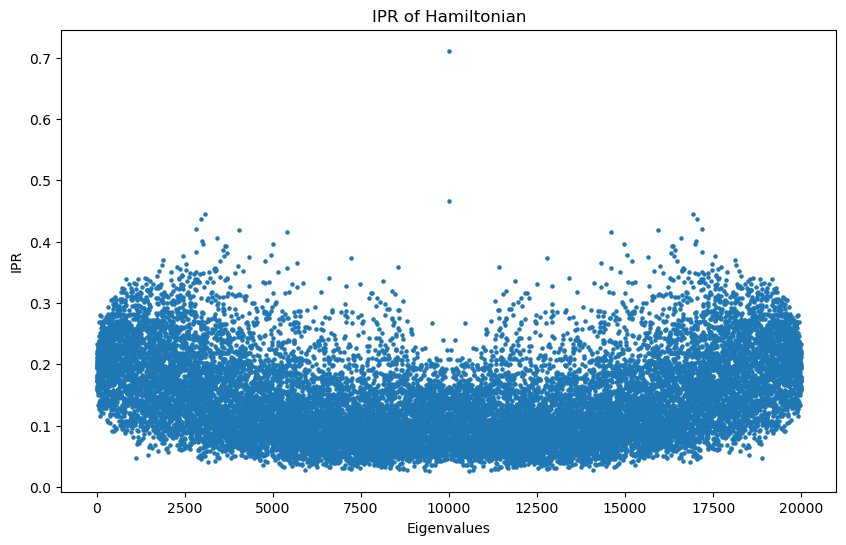

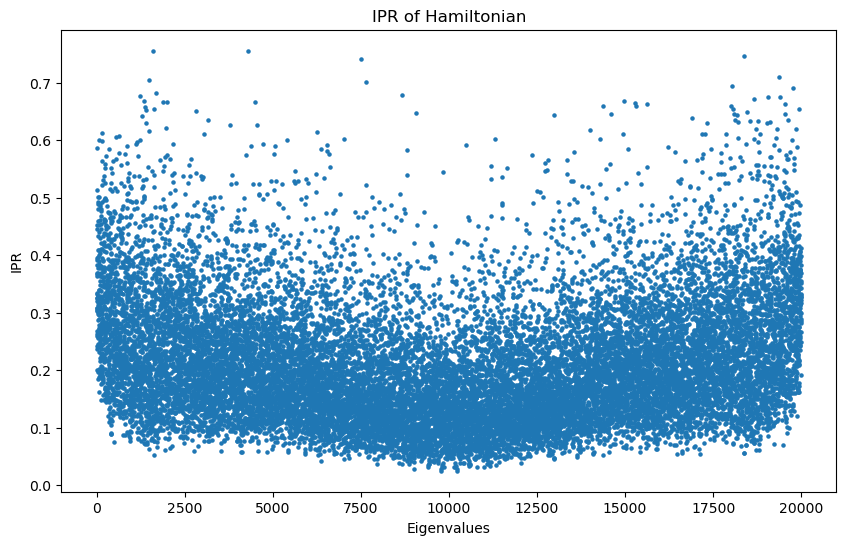

In [55]:
disorder_index = 15
realisation_index = 1
L = 20000

index = np.arange(20000)
plt.figure(figsize=(10, 6))
plt.scatter(index, H_IPR[disorder_index][realisation_index], s=5)
plt.xlabel("Eigenvalues")
plt.ylabel("IPR")
plt.title("IPR of Hamiltonian")
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(index, spectral_localiser_IPR[disorder_index][realisation_index], s=5)
plt.xlabel("Eigenvalues")
plt.ylabel("IPR")
plt.title("IPR of Hamiltonian")
plt.show()

Text(0.5, 0.98, 'DOS and IPR at Disorder W=1.50, L=20000')

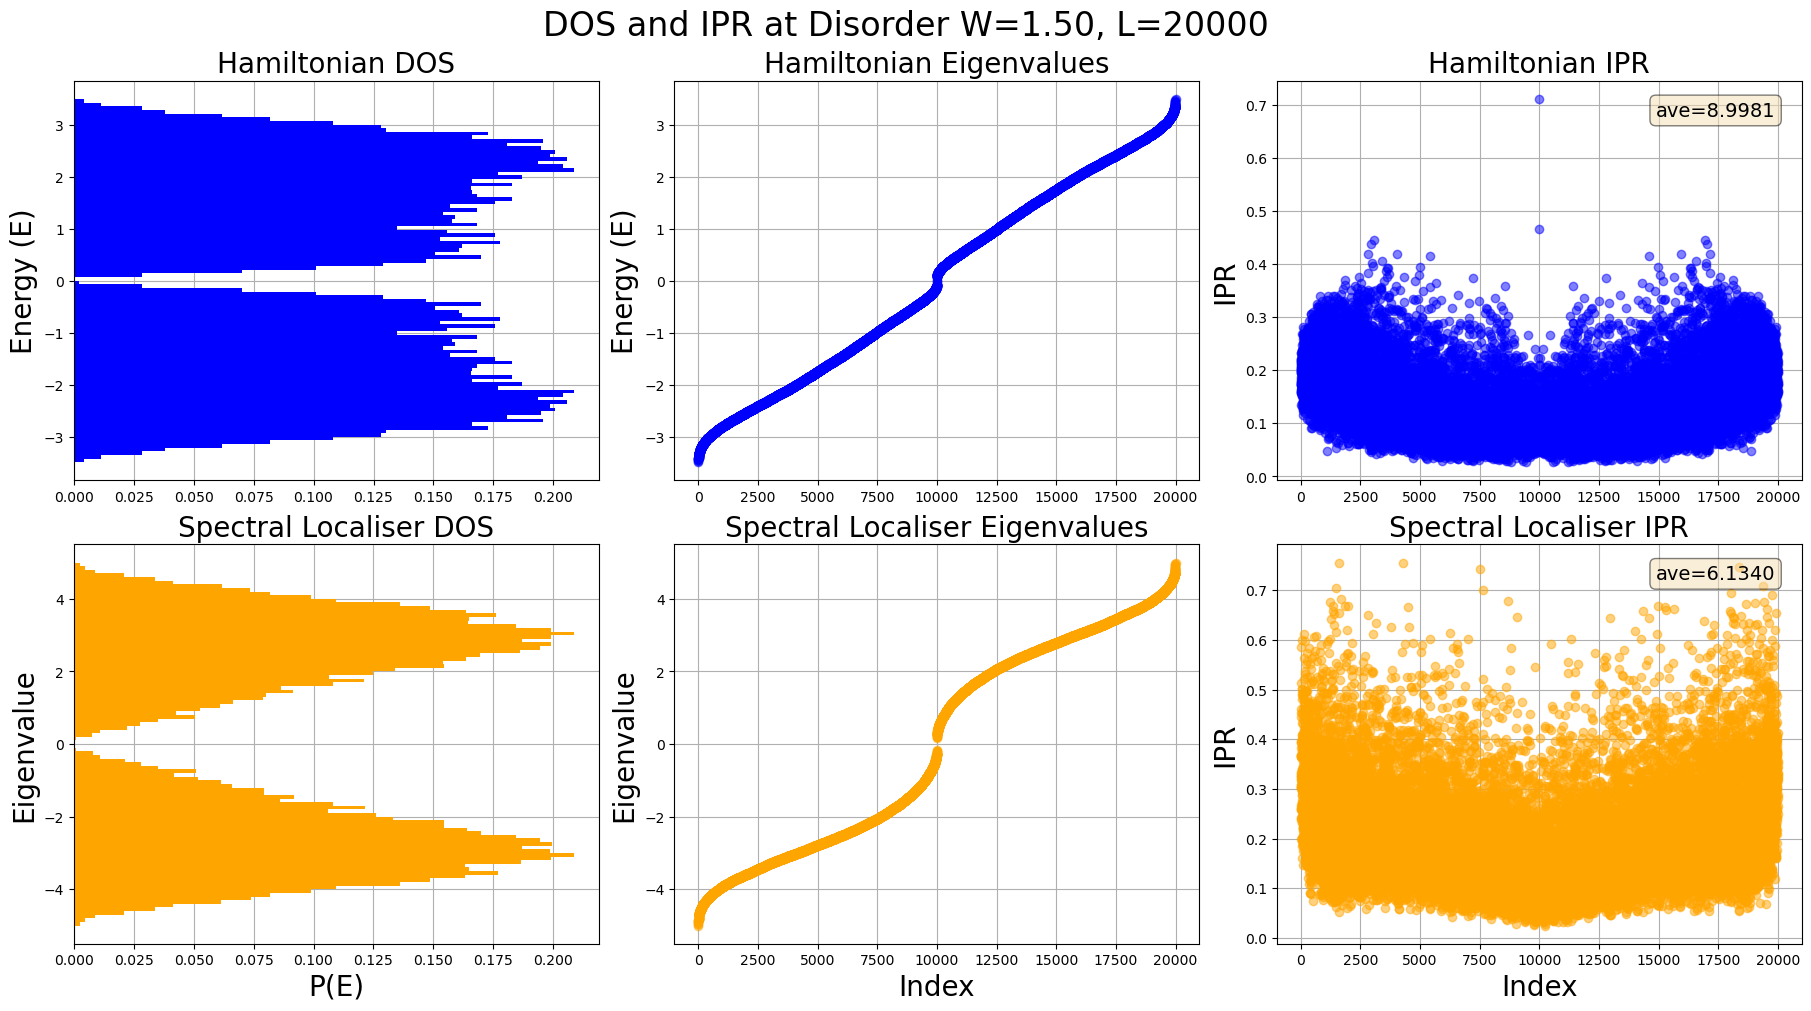

In [56]:

fige, axe = plt.subplots(2,3, figsize=(18,10), constrained_layout=True)

disorder_values = np.linspace(0,2.0,21)

axe[0,0].grid()
axe[1,0].grid()
axe[0,0].set_axisbelow(True)
axe[1,0].set_axisbelow(True)
axe[0,0].hist(H_eigval[disorder_index][realisation_index], bins=100, density=True,  orientation='horizontal', label=f'L={L}', color='blue')
axe[1,0].hist(spectral_localiser_eigval[disorder_index][realisation_index], bins=100, density=True,  orientation='horizontal', label=f'L={L}', color='orange')

axe[0,0].set_title('Hamiltonian DOS', size=20)
axe[1,0].set_title('Spectral Localiser DOS', size=20)
axe[1,0].set_xlabel('P(E)', size=20)
axe[0,0].set_ylabel('Energy (E)', size=20)
axe[1,0].set_ylabel('Eigenvalue', size=20)


axe[0,1].scatter(range(0,L),H_eigval[disorder_index][realisation_index], alpha=0.5, label=f'L={L}', color='blue')
axe[1,1].scatter(range(0,L),spectral_localiser_eigval[disorder_index][realisation_index], alpha=0.5, label=f'L={L}', color='orange')
axe[0,1].set_axisbelow(True)
axe[1,1].set_axisbelow(True)
axe[0,1].grid()
axe[1,1].grid()

axe[0,1].set_title('Hamiltonian Eigenvalues', size=20)
axe[1,1].set_title('Spectral Localiser Eigenvalues', size=20)
axe[1,1].set_xlabel('Index', size=20)
axe[0,1].set_ylabel('Energy (E)', size=20)
axe[1,1].set_ylabel('Eigenvalue', size=20)



axe[0,2].scatter(range(0,L),(H_IPR[disorder_index][realisation_index]), alpha=0.5, label=f'L={L}', color='blue')
axe[1,2].scatter(range(0,L),(spectral_localiser_IPR[disorder_index][realisation_index]), alpha=0.5, label=f'L={L}', color='orange')
axe[0,2].set_axisbelow(True)
axe[1,2].set_axisbelow(True)
axe[0,2].grid()
axe[1,2].grid()

axe[0,2].set_title('Hamiltonian IPR', size=20)
axe[1,2].set_title('Spectral Localiser IPR', size=20)
axe[1,2].set_xlabel('Index', size=20)
axe[0,2].set_ylabel('IPR', size=20)
axe[1,2].set_ylabel('IPR', size=20)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
sum_ipr_h = np.sum(1/H_IPR[disorder_index][realisation_index]) / len(H_IPR[disorder_index][0])
sum_ipr_sl = np.sum(1/spectral_localiser_IPR[disorder_index][realisation_index]) / len(spectral_localiser_IPR[disorder_index][0])
axe[0,2].text(0.95, 0.95, f'ave={sum_ipr_h:.4f}', transform=axe[0,2].transAxes, fontsize=14,
              verticalalignment='top', horizontalalignment='right', bbox=props)

axe[1,2].text(0.95, 0.95, f'ave={sum_ipr_sl:.4f}', transform=axe[1,2].transAxes, fontsize=14,
              verticalalignment='top', horizontalalignment='right', bbox=props)

fige.suptitle(f'DOS and IPR at Disorder W={disorder_values[disorder_index]:.2f}, L={len(H_eigval[disorder_index][0])}', fontsize=24)

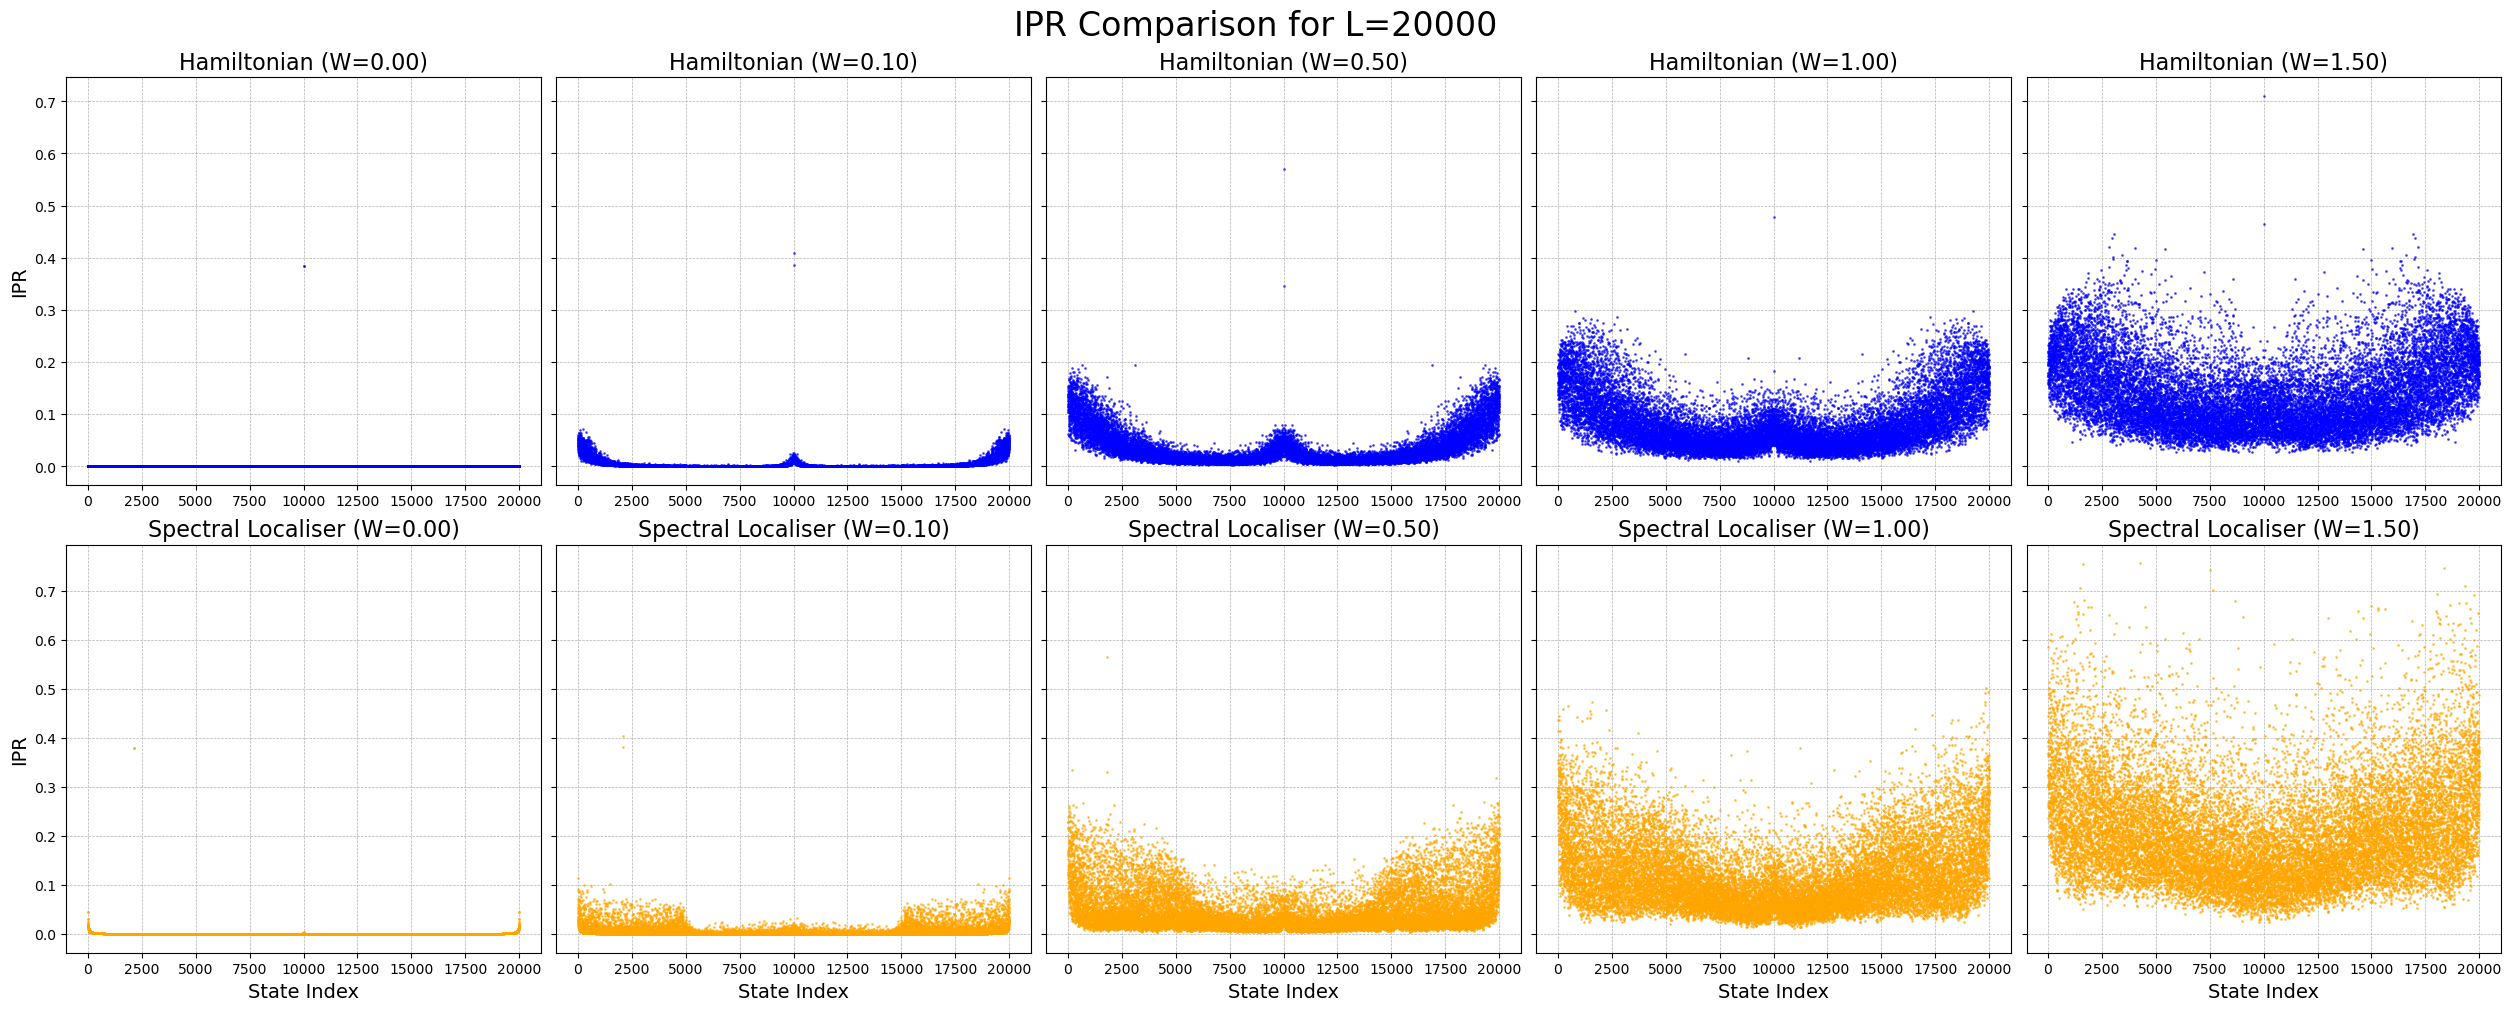

In [58]:
# Define the specific disorder indices you want to plot
disorder_indices_to_plot = [0, 1, 5, 10, 15]
realisation_to_plot = 1 # Using the same realisation index as before

# Create a 2x5 grid of subplots
fig, axes = plt.subplots(2, len(disorder_indices_to_plot), figsize=(25, 10), constrained_layout=True, sharey='row')

fig.suptitle(f'IPR Comparison for L={L_size}', fontsize=24)

for i, dis_idx in enumerate(disorder_indices_to_plot):
    disorder_val = disorder_values[dis_idx]

    # --- Top Row: Hamiltonian IPR ---
    ax_top = axes[0, i]
    ax_top.scatter(range(L_size), H_IPR[dis_idx, realisation_to_plot, :], s=1, alpha=0.6, color='blue')
    ax_top.set_title(f'Hamiltonian (W={disorder_val:.2f})', fontsize=16)
    ax_top.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax_top.set_axisbelow(True)
    if i == 0:
        ax_top.set_ylabel('IPR', fontsize=14)

    # --- Bottom Row: Spectral Localiser IPR ---
    ax_bottom = axes[1, i]
    ax_bottom.scatter(range(L_size), spectral_localiser_IPR[dis_idx, realisation_to_plot, :], s=1, alpha=0.6, color='orange')
    ax_bottom.set_title(f'Spectral Localiser (W={disorder_val:.2f})', fontsize=16)
    ax_bottom.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax_bottom.set_axisbelow(True)
    ax_bottom.set_xlabel('State Index', fontsize=14)
    if i == 0:
        ax_bottom.set_ylabel('IPR', fontsize=14)

plt.show()